In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.cm as cm
from matplotlib.patches import PathPatch
from matplotlib.path import Path

## 1. Warm up
(8 points)

Consider the functions

$f(x,y)=\frac{1}{100}(x^2+y^2)-\frac{1}{2}(cos(3x-3y)+cos(3x+3y))$

$g(x,y)=(x-1)^2+100(x^2-y)^2$

(a) _(1pts.)_ Create a heat map of the functions in range $-10 \leq x,y \leq 10$ for $f$ and $-3 \leq x,y \leq 3$ for $g$.

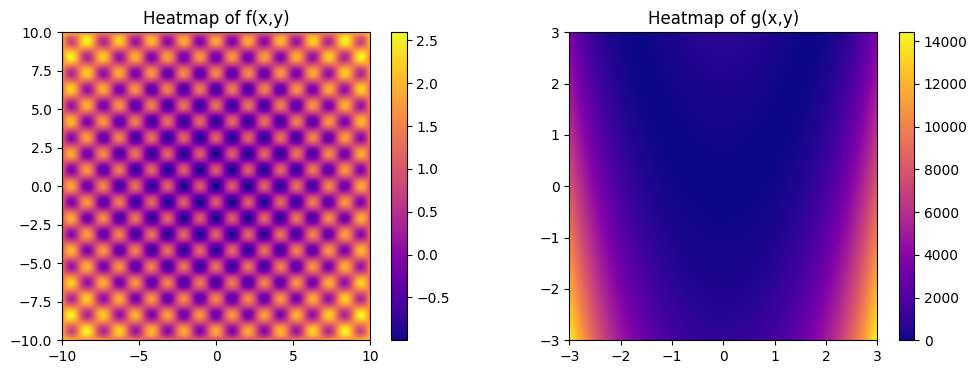

In [2]:
def f(xy): #defining the function f
    x, y = xy
    return 1/100 * (x**2 + y**2) - 1/2 * (np.cos(3*x - 3*y) +  np.cos(3*x + 3*y))

def g(xy): #defining the function g
    x, y = xy
    return (x - 1)**2 + 100*(x**2 - y)**2



dimf = np.linspace(-10, 10, 1000)
dimg = np.linspace(-3, 3, 1000)

Xf, Yf = np.meshgrid(dimf, dimf)
Xg, Yg = np.meshgrid(dimg, dimg)

Z_f = f((Xf, Yf)) #computing f(x,y)
Z_g = g((Xg, Yg)) #computing g(x,y)

#creating a subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))

#heatmap of f
im1 = ax1.imshow(Z_f, cmap = 'plasma', extent=(-10, 10, -10, 10), origin = 'lower')
ax1.set_title('Heatmap of f(x,y)')
fig.colorbar(im1, ax = ax1)

#heatmap of g
im2 = ax2.imshow(Z_g, cmap = 'plasma', extent=(-3, 3, -3, 3), origin = 'lower')
ax2.set_title('Heatmap of g(x,y)')
fig.colorbar(im2, ax = ax2)

plt.show()

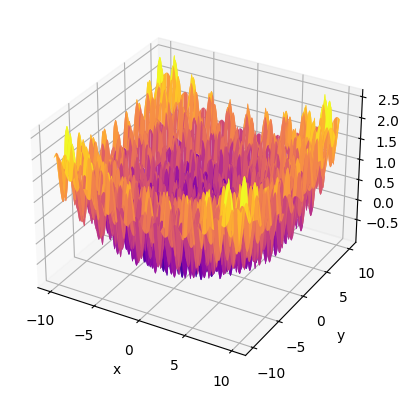

In [3]:
#creating the 3D plot of f
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


surf = ax.plot_surface(Xf, Yf, Z_f, cmap = 'plasma')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

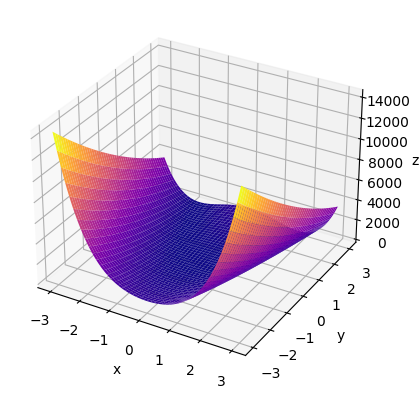

In [4]:
#creating the 3D plot of g
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(Xg, Yg, Z_g, cmap = 'plasma')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

(b) _(2 pts.)_ Describe the shape of the two functions: How do they look like? Are there “jumps” or “flat regions”? What about the optima? How many are there? Are those global or local?

From the heat maps is clear that:
  - $f(x,y)$ is very irregular. It has many optima (both maxima and minima) and that getting closer to the origin they are getting "lower", while the moving away they are getting "higher";

  - $g(x,y)$ is more regular. We see that it seems like there's a big region of global minima on the plane $z=0$.

(c) _(3 pts.)_ Write a Python-script that randomly generates a point $p_0$ in the areas as specified above and optimize the function using the Nelder-Mead algorithm, using $p_0 \in \mathbb{R}^2$ as a starting point, to obtain a point $p_1$.

In [5]:
import random
from scipy.optimize import minimize

p0f = np.random.uniform(low = -10, high = 10, size = (2)); #generating p0
resf = minimize(f, p0f, method='Nelder-Mead', tol=1e-6); #Nelder-Mead algorithm on f to compute p1
p1f = resf.x
p1f

array([-10.44872854,  -4.17947901])

In [6]:
p0g = np.random.uniform(low = -3, high = 3, size = (2)); #generating p0
resg = minimize(g, p0g, method='Nelder-Mead', tol=1e-6); #Nelder-Mead algorithm on g to compute p1
p1g = resg.x
p1g

array([1.00000011, 1.00000026])

(d) _(2 pts.)_ Repeat the procedure from (c) $10$ times and add the resulting pairs of points to the heat maps from (a)
(connect pairs of $p_0$ and $p_1$ by lines). What do you observe? Does the method converge to a unique optimum or are
there many? Did the algorithm produce good results or not? And why?

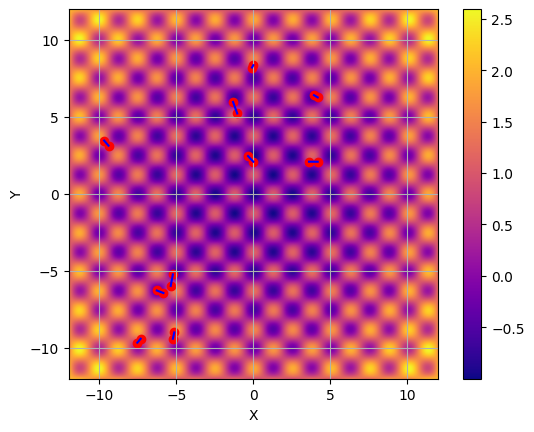

In [7]:
v = []; #creating a list for p0s
w = []; #creating a list for p1s
for i in range(10):
    a = np.random.uniform(low = -10, high = 10, size = (2)); 
    v.append(a) #adding a random value p0 to the list
    resf = minimize(f, v[i], method='Nelder-Mead');
    p1f = resf.x 
    w.append(p1f) #adding to the list the relative value p1 computed through the algorithm Nelder-Mead on f 


im1 = plt.imshow(Z_f, cmap='plasma', extent=(-12, 12, -12, 12), origin='lower') #creating the heatmap of f

for i in range(10):

    plt.scatter(v[i][0], v[i][1],color='r') #plotting the points p0
    plt.scatter(w[i][0], w[i][1],color='r') #plotting the points p1
    plt.plot([w[i][0],v[i][0]], [w[i][1],v[i][1]],'b-') #plotting the lines connecting p0 and p1

plt.colorbar(im1)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

As we can see the algorithm will lead to the closest optima, depending on the starting point $p_0$.

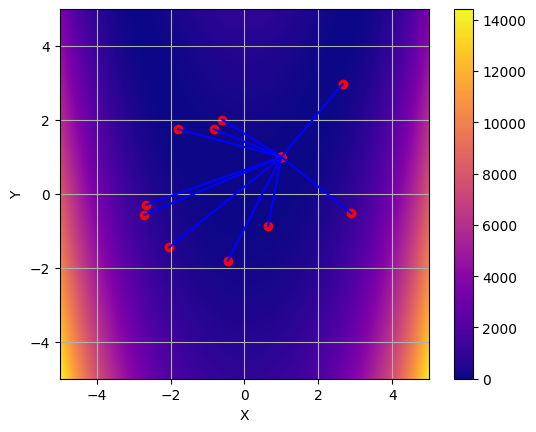

In [8]:
v = []; #creating a list for p0s
w = []; #creating a list for p01
for i in range(10):
    a = np.random.uniform(low = -3, high = 3, size = (2)); 
    v.append(a) #adding a random value p0 to the list
    resg = minimize(g, v[i], method='Nelder-Mead');
    p1g = resg.x 
    w.append(p1g) #adding to the list the relative value p1 computed through the algorithm Nelder-Mead on g


im2 = plt.imshow(Z_g, cmap='plasma', extent=(-5, 5, -5, 5), origin='lower') #creating the heatmap of g

for i in range(10):

    plt.scatter(v[i][0], v[i][1],color='r') #plotting the points p0
    plt.scatter(w[i][0], w[i][1],color='r') #plotting the points p1
    plt.plot([w[i][0],v[i][0]], [w[i][1],v[i][1]],'b-') #plotting the lines connecting p0 and p1

plt.colorbar(im2)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In this case from every $p_0$ the algorithm starts, it will always land in the same minimum which is part of a bigger region of global minima.

## 2. Modeling

Consider the following problem: You want to sell paper boxes. To make a box, take two identical open boxes (boxes
without lid side) and put them together by sliding them into each other. Each open box you use is made from a single
sheet of paper (see Figure 1 for an illustration. Note, that the sheet does not have to be a square). You get 2.50\$ for every
cubic centimeter of volume! However, you will have to pay 0.75\$ for each square centimeter of paper you use. The larger
the paper, the more complicated it becomes to make a single box. Up to a constant time you need to grab the paper, you
observe that if you double the length of the longest side, it will take you about four times as long to make a box;3 the shorter side of the sheet doesn’t seem to matter. Keep in mind that your workday has a limited number of hours. How to
get rich?

(a) _(4 pts.)_ Formalize the problem described above. Explain your choices!
Note that the above description does not lead to a unique formalization, but there are a few issues which you
can decide on in a reasonable way (such as labor costs to make the box). In particular, the explanation is just as
important as the formula you come up with.

We decided to maximize the profit and to have a problem in standard form we minimized the negative of the target function.
For the volume we used $\frac{b^2h}{27}$ and for the surface we used $b \cdot h$, where:
- $b$ is the longer side
- $h$ is the height of the paper sheet (i.e. the shorter side) 
$V = \frac{b^2h}{27}$ comes from $\frac{b}{3}\cdot\frac{b}{3}\cdot\frac{h}{3}$


We doubled the surface, because we know that a box is made of two sheet of papers slided into each other, assuming taht the volume won't change.

Then we took as constraint $b \leq 240$ assuming that:
- we only want to build oly one box during the entire working day (because otherwise we would had to consider the number of boxes $n$);
- for a side of $1cm$ we would work for one minute;
- it will take you about four times as long to make a box if we double the length of the long side (so $t= \frac{b}{2}$);
- our working day will be of 8 hours and we computed in terms of minutes ($8h=480min$).

(b) _(2 pts.)_ Turn your formalization into an optimization problem in standard form.

$\displaystyle \min_{b,h}\; t(b,h) = - 2,5 \cdot \frac{b^2h}{27}+ 0,75 \cdot 2 \cdot bh$

$\;\;\;\;\;\; s.\;t.\;b \leq 240$

(c) _(3 pts.)_ Implement your approach: Write a Python-script that optimizes a reasonable starting point using the
Nelder-Mead algorithm.

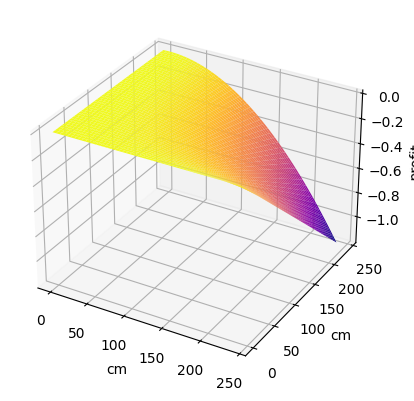

In [9]:
#definition of the target function
def t(bh):
    b, h = bh
    return -(2.5*(b**2)*h)/27 + 0.75*2*b*h

dim = np.linspace(0, 240, 1000) # we bounded the support for visualization
B, H = np.meshgrid(dim, dim)

Z_t = t((B, H))

plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(B, H, Z_t, cmap = 'plasma')


ax.set_xlabel('cm')
ax.set_ylabel('cm')
ax.set_zlabel('profit', rotation=90)

plt.show()

In [ ]:
p0 = [15,15]
res = minimize(t, p0, method='Nelder-Mead', tol=1e-6, bounds = [(1,240),(1,240)]);
p1 = res.x
profit = t(p1)
print(f'The dimensions of the sheet are: {p1}, the profit is: {-profit}')

The dimensions of the sheet are: [240. 240.], the profit is: 1193600.0


We decided to start from $p_0 = [15,\; 15]^T$  (reasonable dimension for a paper) and applied the algorithm to find the relative point $p_1$. In this range the algorithm will always lead to 

$$p_1 = \begin{bmatrix} 240 \\\ 240 \end{bmatrix} $$

and this is quite obvious considering the strong assumptions we made.

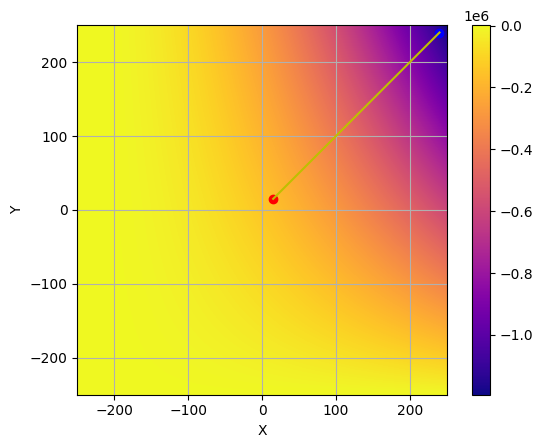

In [11]:
im3 = plt.imshow(Z_t, cmap='plasma', extent=(-250, 250, -250, 250), origin='lower') #creating the heatmap of f

plt.scatter(p0[0], p0[1],color='r') #plotting the points p0
plt.scatter(p1[0], p1[1], color='b') #plotting the points p1
plt.plot([p0[0],p1[0]], [p0[1],p1[1]],'y-') #plotting the lines connecting p0 and p1

plt.colorbar(im3)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

We plotted the heatmap to understand the direction of the algorithm and actually it converges properly.

(d) _(3 pts.)_ Discuss your results. Do you obtain a good solution? Can you find an analytic solution or get the same insight without the help of a computer? Also criticize the setup and the decisions you made in part (a): Is there enough information in the task description? Do you need additional (world) knowledge? If “yes”, which could be the most relevant? And what are indicators for that? What is the advise you can give on this problem?

The results are correct for sure, but we made very strong assumptions due to the fact that the problem was ill posed:

- we decided to build only one box during the entire working day, which is a huge simplification;
- for a side of $1cm$ needs a minute of work, that seemed reasonable;
- our working day is of 8 hours, that seems reasonable.

We could have computed the gradient of the target function $\nabla t(b,h)$:


$$\nabla t(b,h) = \begin{bmatrix} -\frac{2 \cdot 2.5}{27}bh+1.5h \\\ \\\ -\frac{2.5}{27}b^2+1.5b \end{bmatrix} $$

and by putting it equal to the zero vector we could have obtained the following optima:

$$A = \begin{bmatrix} 0 \\\ 0 \end{bmatrix} $$

and 

$$A = \begin{bmatrix} \frac{1.5\cdot 27}{2.5} \\\ \\\ 0 \end{bmatrix} $$

In particular, the Hessian matrix

$$
H(b,h)=\begin{bmatrix}
-\frac{2\cdot 2.5}{27}h & -\frac{2\cdot 2.5}{27}b+1.5\\
-\frac{2\cdot 2.5}{27}b+1.5 & 0
\end{bmatrix}
$$

is positive definite in both points, so they are minima.

It would have been more usefull to have:

- Maximum working hours;
- An explicit function of the working time related to the dimension of the longest side (which would have also an impact on the number of boxes producted).


Both of them are strictly relevant, we wouldn't say that one is more important than the other to obtain a conclusion.

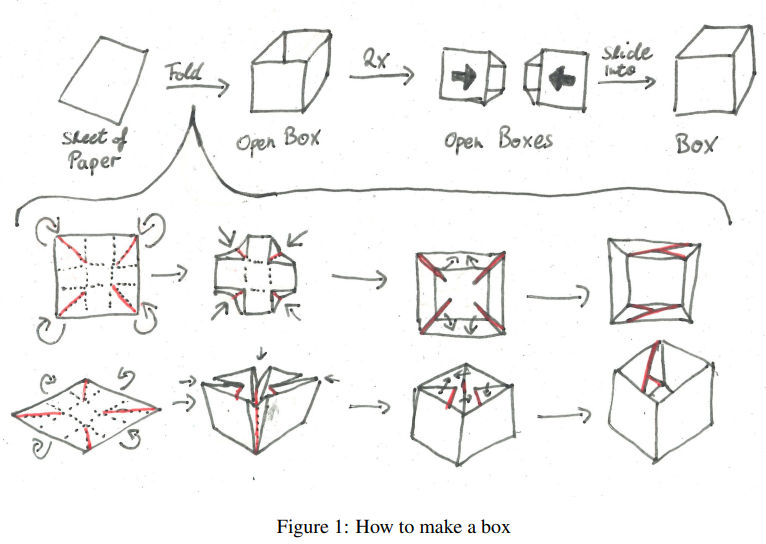